# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | belyy yar
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | amposta
Processing Record 7 of Set 1 | qarauyl
Processing Record 8 of Set 1 | princeville
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | padangsidempuan
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | hafar al-batin
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | vlahita
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | mejit
Processing Record 18 of Set 1 | fale old settlement
Processing Record 19 of Set 1 | vadso
Processing Record 20 of Set 1 | patterson
Processing Record 21 of Set 1 | enshi
Processing Record 22 of Set 1 | portland
Proces

Processing Record 39 of Set 4 | uchiza
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | puerto lopez
Processing Record 42 of Set 4 | vohipaho
City not found. Skipping...
Processing Record 43 of Set 4 | oranjemund
Processing Record 44 of Set 4 | weno
Processing Record 45 of Set 4 | aral
Processing Record 46 of Set 4 | tralee
Processing Record 47 of Set 4 | san andres
Processing Record 48 of Set 4 | narvik
Processing Record 49 of Set 4 | vilyuchinsk
Processing Record 0 of Set 5 | kailua-kona
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | belidzhi
Processing Record 3 of Set 5 | dalandzadgad
Processing Record 4 of Set 5 | pader
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | aswan
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | es castell
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | guerrero negro
Processing Record 11 of Set 5 | queenstown
Pr

Processing Record 29 of Set 8 | jumla
Processing Record 30 of Set 8 | kyaikkami
Processing Record 31 of Set 8 | bac lieu
Processing Record 32 of Set 8 | medicine hat
Processing Record 33 of Set 8 | puerto cortez
Processing Record 34 of Set 8 | great falls
Processing Record 35 of Set 8 | kottaiyur
Processing Record 36 of Set 8 | barcelos
Processing Record 37 of Set 8 | pandan
Processing Record 38 of Set 8 | ringkobing
Processing Record 39 of Set 8 | copperas cove
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | pointe-noire
Processing Record 42 of Set 8 | merizo village
Processing Record 43 of Set 8 | okha
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | suai
City not found. Skipping...
Processing Record 46 of Set 8 | misratah
Processing Record 47 of Set 8 | kahriz
Processing Record 48 of Set 8 | rengasdengklok
Processing Record 49 of Set 8 | uniao da vitoria
Processing Record 0 of Set 9 | kham sakae saeng
Processing Record 1 of Set 9 | sur
Pro

Processing Record 17 of Set 12 | qal'at bishah
City not found. Skipping...
Processing Record 18 of Set 12 | am djarass
City not found. Skipping...
Processing Record 19 of Set 12 | san patricio
Processing Record 20 of Set 12 | peterhead
Processing Record 21 of Set 12 | pacific grove
Processing Record 22 of Set 12 | kourou
Processing Record 23 of Set 12 | bandon
Processing Record 24 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 25 of Set 12 | glendive
Processing Record 26 of Set 12 | lamar
Processing Record 27 of Set 12 | tionk essil
Processing Record 28 of Set 12 | kristiansund
Processing Record 29 of Set 12 | loa janan
Processing Record 30 of Set 12 | manaure
Processing Record 31 of Set 12 | luwuk
Processing Record 32 of Set 12 | vyksa
Processing Record 33 of Set 12 | monrovia
Processing Record 34 of Set 12 | kargopol'
Processing Record 35 of Set 12 | primero de enero
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,294.32,95,75,3.60,ZA,1705008385
1,port-aux-francais,-49.3500,70.2167,280.28,92,100,11.10,TF,1705008385
2,belyy yar,53.6039,91.3903,265.09,93,75,3.00,RU,1705008385
3,geraldton,-28.7667,114.6000,295.38,83,100,4.12,AU,1705008385
4,grytviken,-54.2811,-36.5092,276.63,86,61,4.90,GS,1705008386


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,294.32,95,75,3.60,ZA,1705008385
1,port-aux-francais,-49.3500,70.2167,280.28,92,100,11.10,TF,1705008385
2,belyy yar,53.6039,91.3903,265.09,93,75,3.00,RU,1705008385
3,geraldton,-28.7667,114.6000,295.38,83,100,4.12,AU,1705008385
4,grytviken,-54.2811,-36.5092,276.63,86,61,4.90,GS,1705008386


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

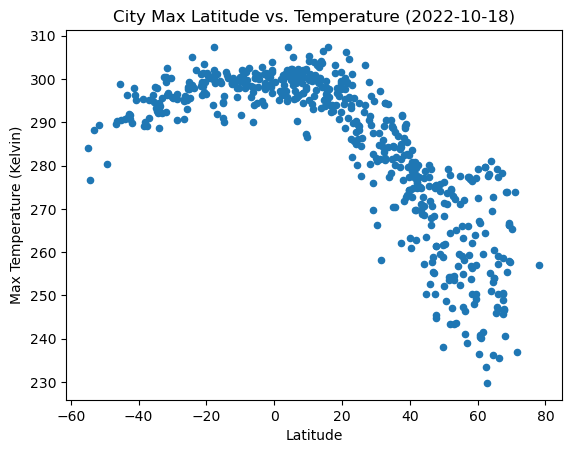

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat',
                          y='Max Temp', title='City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Kelvin)')


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

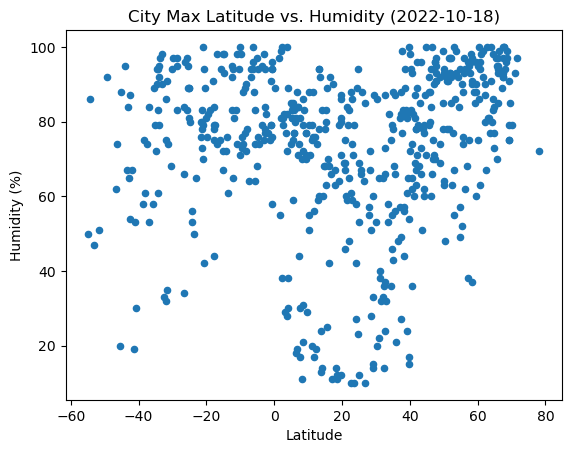

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat',
                          y='Humidity', title='City Max Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

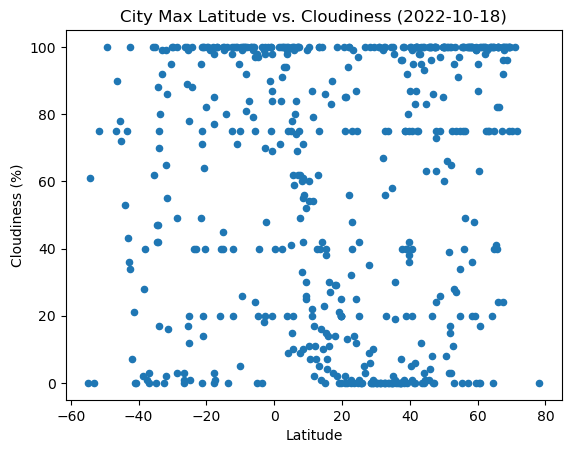

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat',
                          y='Cloudiness', title='City Max Latitude vs. Cloudiness (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

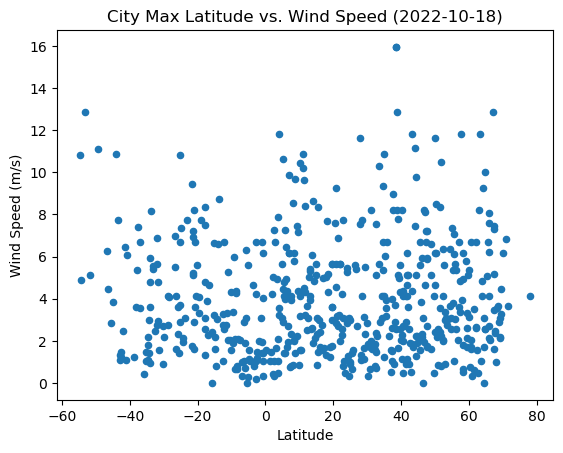

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat',
                          y='Wind Speed', title='City Max Latitude vs. Wind Speed (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


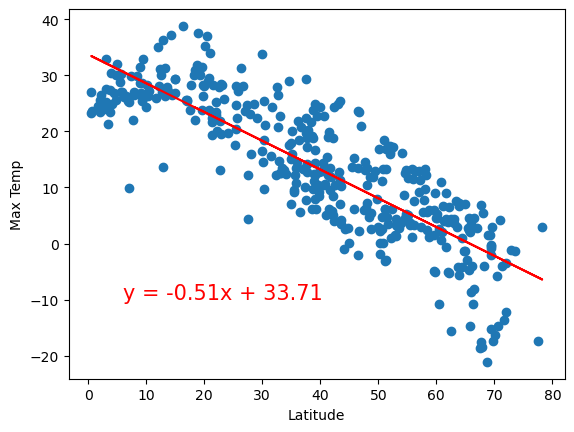

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


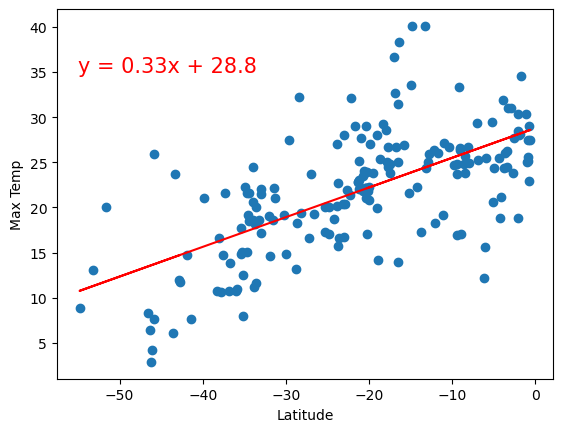

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


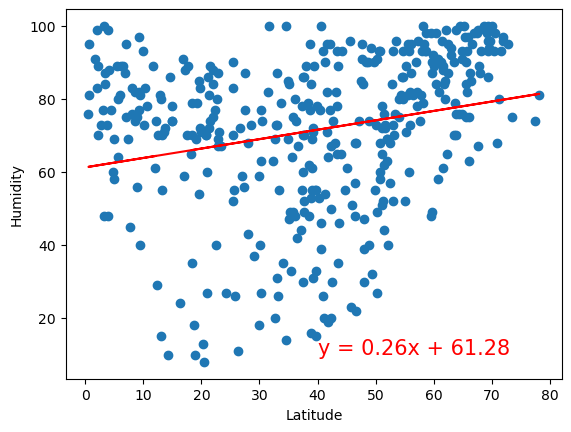

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


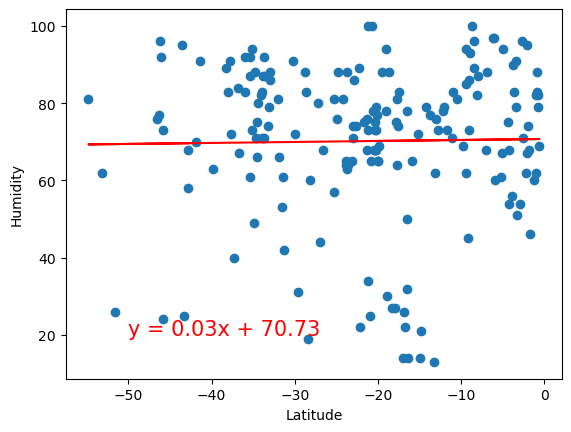

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


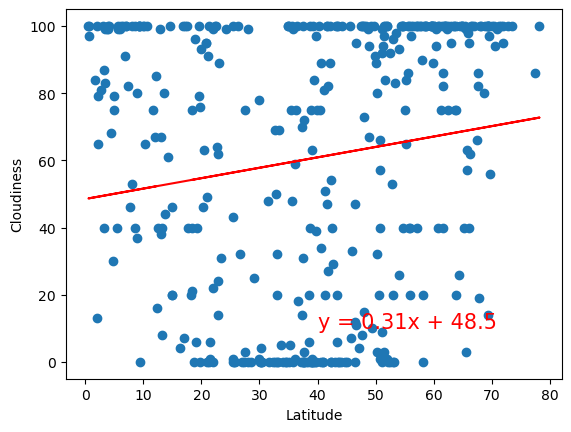

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


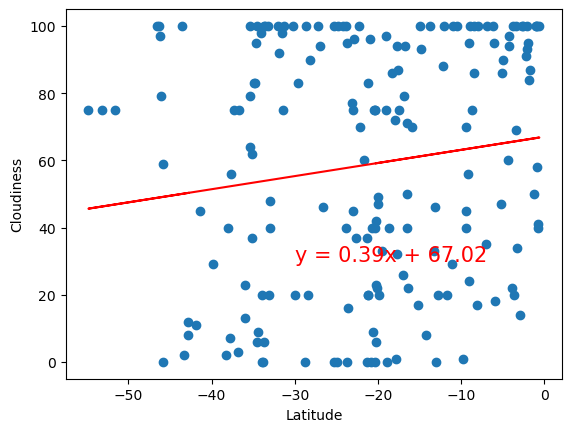

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


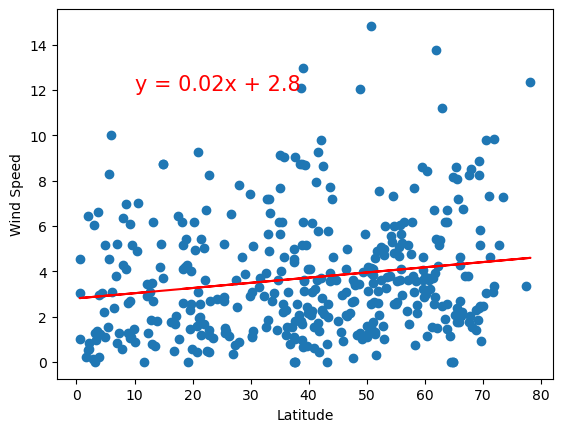

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


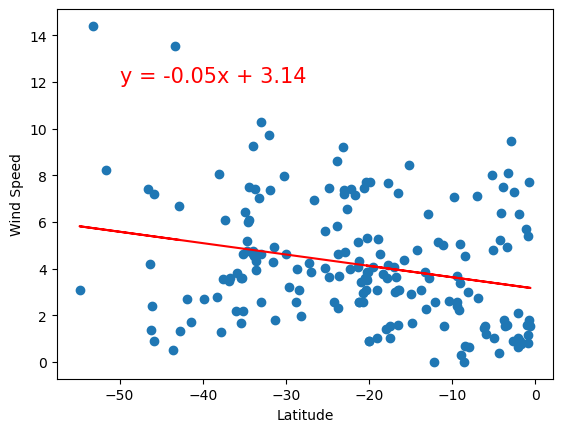

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE